In [1]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv('data.csv')

0.0
        Multiple Comparison of Means - Tukey HSD, FWER=0.50         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
        merge1 partition_sort  -0.0255    0.0 -0.0261  -0.025   True
        merge1            qs1  -0.0142    0.0 -0.0148 -0.0136   True
        merge1            qs2  -0.0004 0.8951 -0.0009  0.0002  False
        merge1            qs3  -0.0006 0.4793 -0.0012    -0.0   True
        merge1            qs4  -0.0002  0.985 -0.0008  0.0003  False
        merge1            qs5  -0.0035    0.0 -0.0041  -0.003   True
partition_sort            qs1   0.0114    0.0  0.0108  0.0119   True
partition_sort            qs2   0.0252    0.0  0.0246  0.0257   True
partition_sort            qs3   0.0249    0.0  0.0244  0.0255   True
partition_sort            qs4   0.0253    0.0  0.0247  0.0259   True
partition_sort            qs5    0.022    0.0  0.0214  0.0226   True
           qs1            qs2 

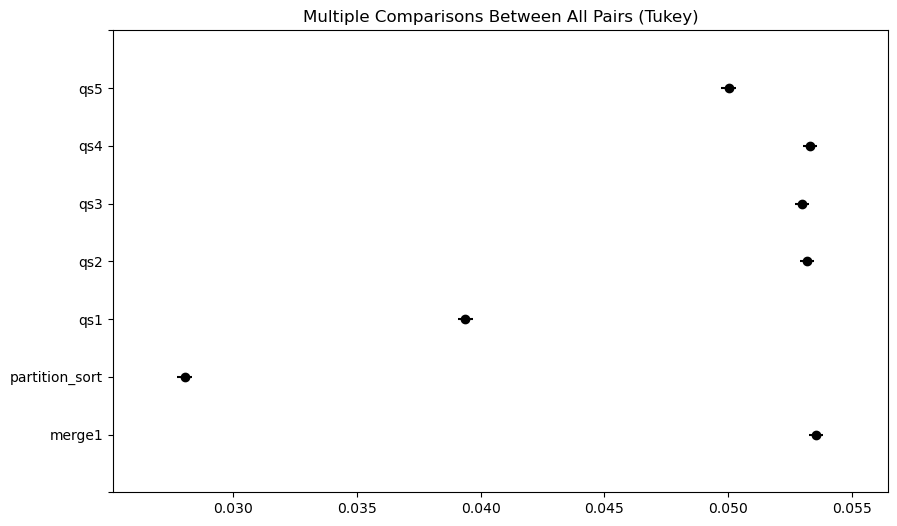

In [3]:
anova = stats.f_oneway(df['qs1'], df['qs2'], df['qs3'], df['qs4'], df['qs5'], df['merge1'], df['partition_sort'])
print(anova.pvalue)

df_melt = pd.melt(df)
posthoc = pairwise_tukeyhsd(
    df_melt['value'], df_melt['variable'],
    alpha=0.5
)

print(posthoc)
fig = posthoc.plot_simultaneous()